# HW4 Simulation of Income
## Author: Fiona Fan
## Class: MPCS 30000

## Part 1

<IPython.core.display.Javascript object>


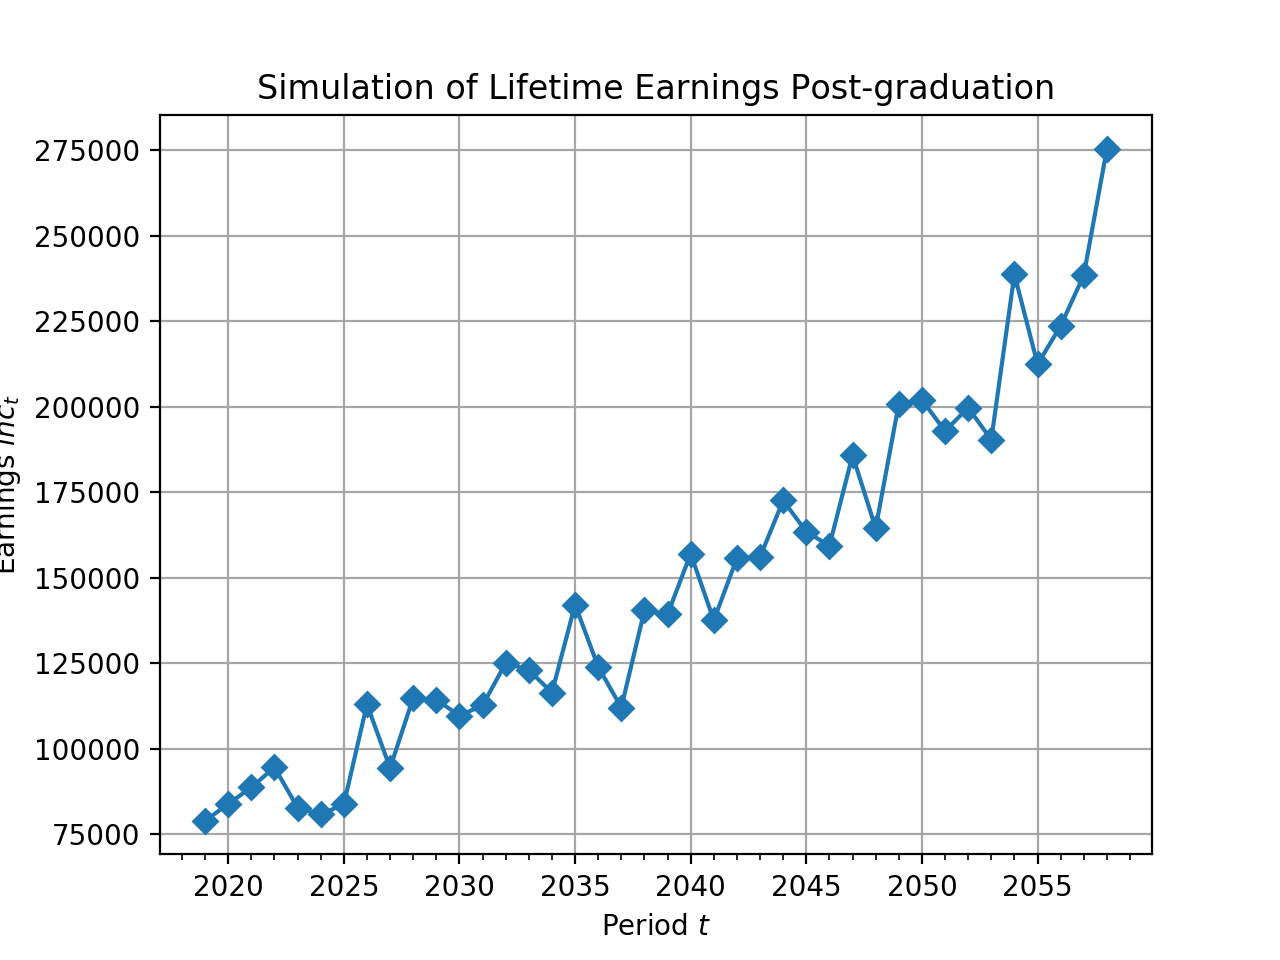

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import math
from matplotlib.ticker import MultipleLocator

#parameters
sigma = 0.1
rho = 0.2
g = 0.03
inc_0 = 80000
t_start=2019
t_end=2058
n_sim=10000
per=t_end-t_start+1
mean_err=0

#create time vector
t_vec = np.linspace(t_start,t_end,per)

#create an array sized n_sim*per of random normal errors
all_err=np.random.normal(mean_err,sigma,n_sim*per)
err=np.reshape(all_err,(n_sim,per))

#create empty vector by size of per, fill first period with 2019 income
inc_vec=np.zeros((1,per))
inc_2019=math.exp(math.log(inc_0)+err[0][0])
inc_vec[0]=inc_2019

#populate the vector based on the update rule
for i in range (1,per):
    inc_vec[0][i]=np.exp((1-rho)*(np.log(inc_0)+g*i)+rho*np.log(inc_vec[0][i-1])+err[0][i])


#plot
fig, ax = plt.subplots()
plt.plot(t_vec, inc_vec[0][:], marker='D')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulation of Lifetime Earnings Post-graduation')
plt.xlabel(r'Period $t$')
plt.ylabel(r'Earnings $inc_{t}$')
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)

plt.show()



## Part 2

<IPython.core.display.Javascript object>


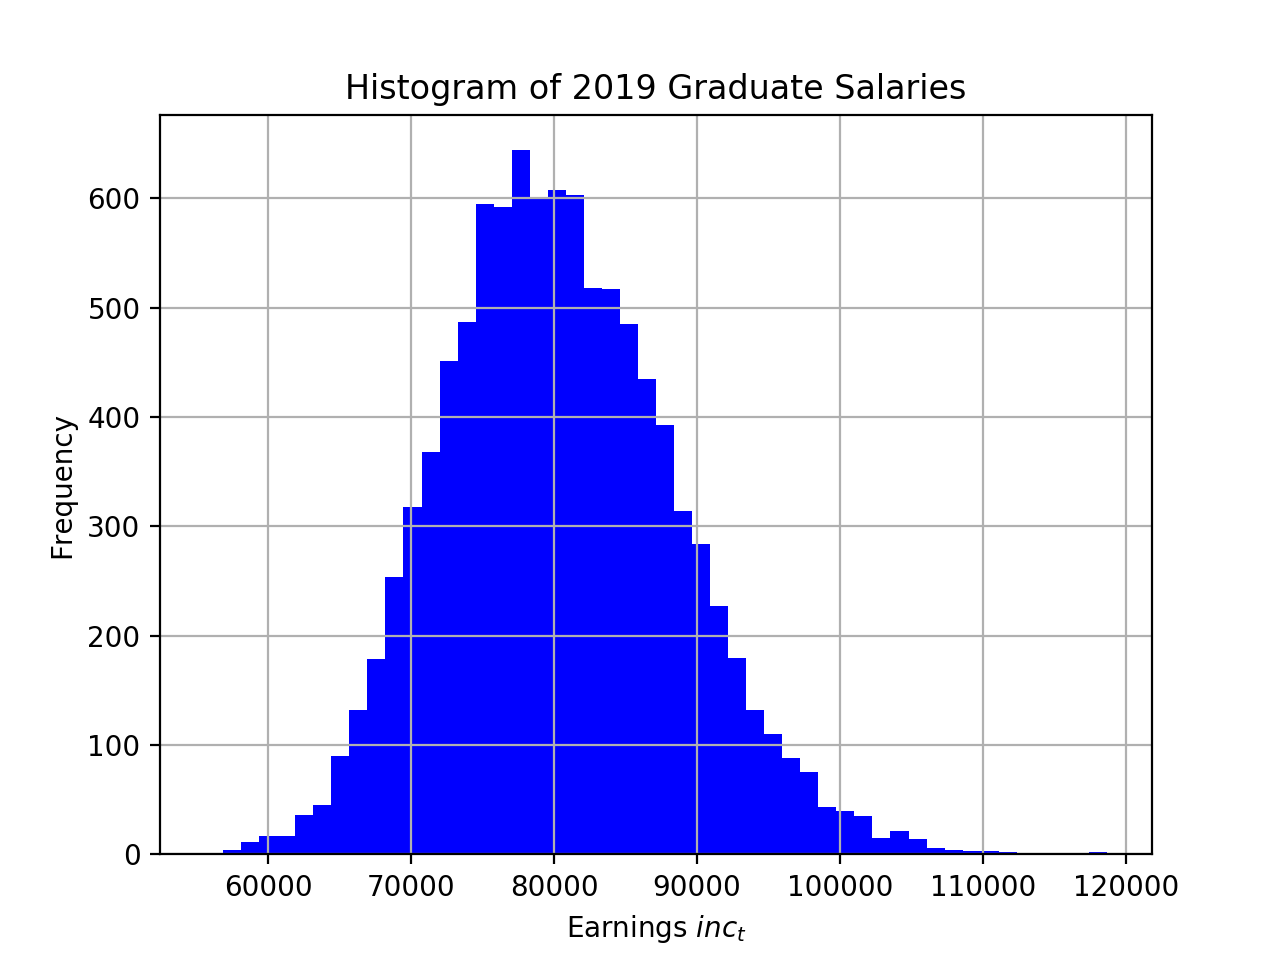

In [4]:
#get all possible 2019 incomes based on n_sim simulations
err_2019=err[:,0].reshape((n_sim,1))
inc2019_pos=np.exp(math.log(inc_0)+err_2019)

fig, ax = plt.subplots()
plt.hist(inc2019_pos, 50, facecolor='b')
plt.xlabel(r'Earnings $inc_{t}$')
plt.ylabel('Frequency')
plt.title('Histogram of 2019 Graduate Salaries')
plt.grid(True)
plt.show()

In [4]:
pct100000=(np.sum(inc2019_pos>100000))/n_sim
pct70000=(np.sum(inc2019_pos<70000))/n_sim
print ('{}% of people earn more than $100,000 and {}% of people earn less than $70,000'.format(pct100000*100,pct70000*100))

1.31% of people earn more than $100,000 and 9.030000000000001% of people earn less than $70,000


The histogram is shaped like a bell curve

## Part 3

<IPython.core.display.Javascript object>


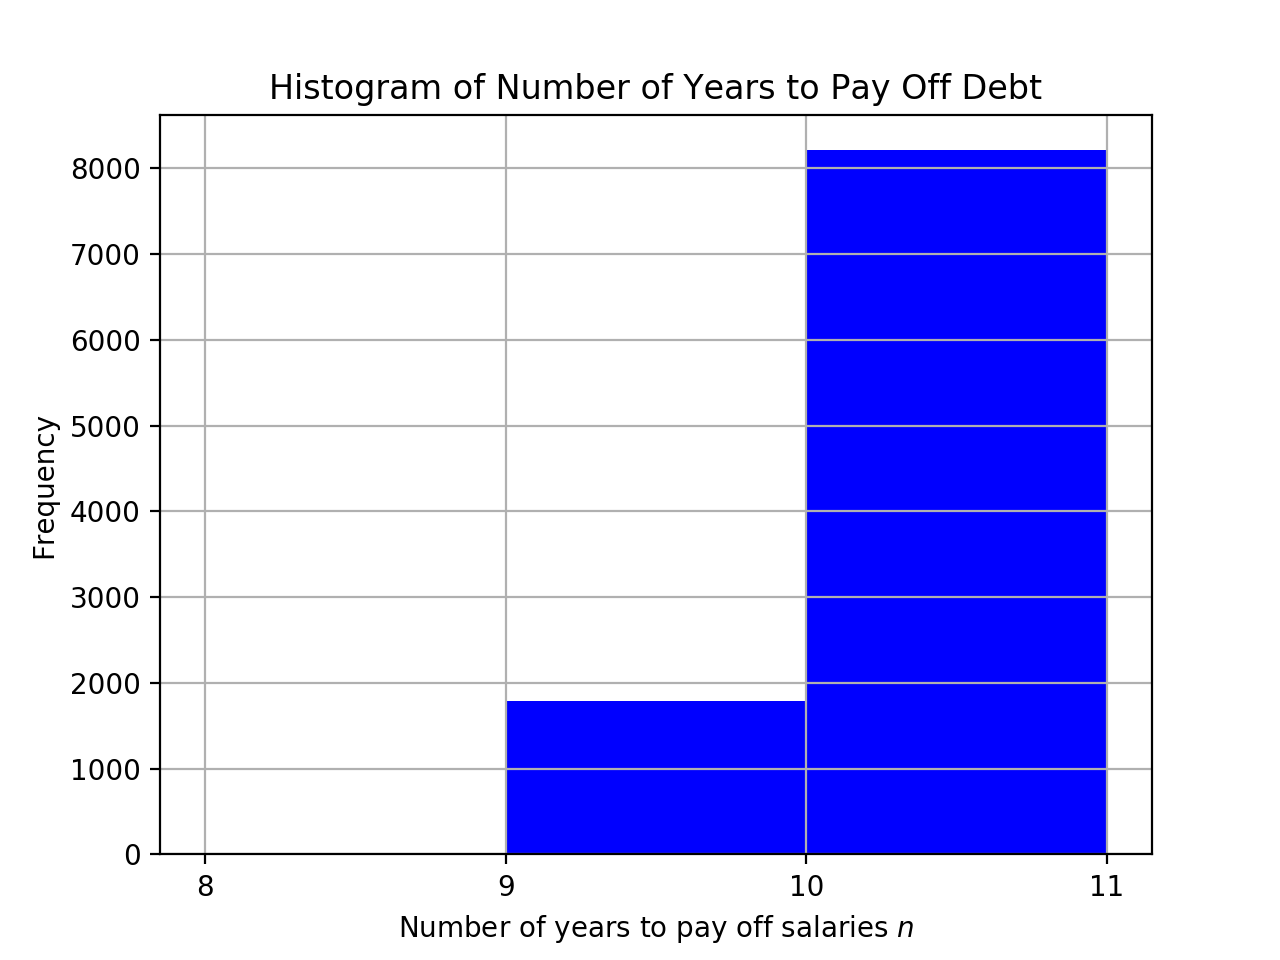

17.89% of the people are able to pay off the loan in 10 years.


In [5]:

pct=0.1
debt=95000

'''
get_nyrs takes an array of normally distributed random errors and the following parameters as inputs:
    sigma, rho, g, inc_0, pct, debt, n_sim, per
It gives as output an array num_years (n_sim,1) in size that stores the number of years to pay off debt for each simulation
graph is a handle signally whether to graph, defaulted to be true
It also prints out the pct of simulations where the debt can be paid off under 10 years. 
'''
def get_nyrs(err,args, graph=True):
    sigma, rho, g, inc_0, pct, debt, n_sim, per = args
    all_inc=np.zeros(np.shape(err))
    err_2019=err[:,0].reshape((n_sim,1))
    inc2019_pos=np.exp(math.log(inc_0)+err_2019)
    all_inc[:,0]=np.reshape(inc2019_pos,(n_sim))
    num_years=np.zeros((n_sim,1))
    
    for k in range(n_sim):
        s=all_inc[k][0]*pct
        n_yr=0
        for i in range (1,per):
            all_inc[k][i]=np.exp((1-rho)*(math.log(inc_0)+g*i)+rho*np.log(all_inc[k][i-1])+err[k][i])
            if s<debt:
                s+=all_inc[k][i]*pct
                n_yr+=1
        num_years[k]=n_yr
    
    if graph:
        fig, ax = plt.subplots()

        # plt.hist(all_inc[:,8].reshape((n_sim,1)),50,facecolor='b')
        plt.hist(num_years,int(np.max(num_years)-np.min(num_years)),facecolor='b')
        plt.xlabel(r'Number of years to pay off salaries $n$')
        plt.ylabel('Frequency')
        plt.title('Histogram of Number of Years to Pay Off Debt')
        plt.xticks(np.arange(np.min(num_years), np.max(num_years) + 1))
        plt.grid(True)
        plt.show()
        
    yr9=(np.sum(num_years<10))/n_sim
#     yr10=(np.sum(num_years<=10))/n_sim
    print ('{}% of the people are able to pay off the loan in 10 years.'.format(yr9*100))
#     print ('{}% of the people are able to pay off the loan in 10 years.'.format(yr10*100))
    return num_years

num_years=get_nyrs(err,(sigma, rho, g, inc_0, pct, debt, n_sim, per))

## Part 4

<IPython.core.display.Javascript object>


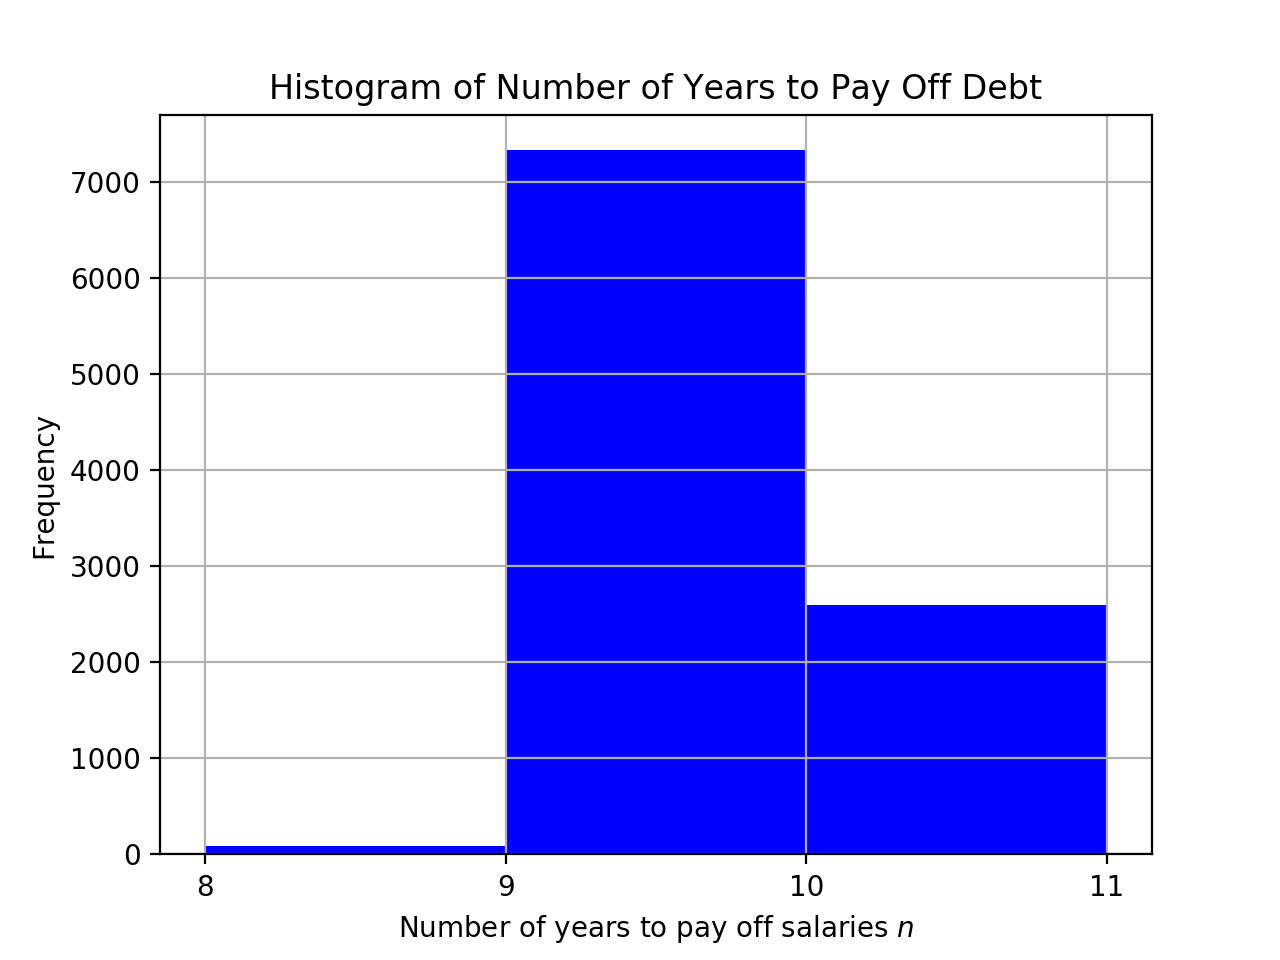

74.08% of the people are able to pay off the loan in 10 years.


In [6]:
inc0_new=85000
sigma_new=0.15
num_years_new=get_nyrs(err,(sigma_new, rho, g, inc0_new, pct, debt, n_sim, per))